In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel, wilcoxon 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style='darkgrid')

# 1. FoodPrice

In [2]:
df = pd.read_csv('Data/FoodPrice_in_Turkey.csv')
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


## 1.1  Với mức ý nghĩa 5% kiểm định giả thuyết giá bán gạo trung bình năm 2019 là 10 Lira/kg

- H0 : price = 10
- H1 : price != 10

In [3]:
rice_data = df[(df['ProductName'] == 'Rice - Retail')&
          (df['Year'] == 2019)]
statistic, p_value = ttest_1samp(rice_data['Price'],popmean = 10)
print(f'Giá trị t-statistic: {statistic}')
print(f'Giá trị p_value: {p_value}')

Giá trị t-statistic: -6.319885434592856
Giá trị p_value: 8.812949954818996e-08


### Kết luận : p_value < $\alpha$ => Bác bỏ H0, vậy giá gạo trung bình năm 2019 khác 10 Lira / kg

## 1.2 Với mức ý nghĩa 5% hãy kiểm định giả thuyết: Giá bột mỳ và giá gạo ở Turkey năm 2019 là bằng nhau

- H0 : price_rice = wheat_price
- H1 : price_rice != wheat_price

In [4]:
wheat_data = df[(df['ProductName'] == 'Wheat flour - Retail')&
          (df['Year'] == 2019)]
statistic, p_value = ttest_ind(rice_data['Price'],wheat_data['Price'], equal_var = False)
print(f'Giá trị t-statistic: {statistic}')
print(f'Giá trị p_value: {p_value}')

Giá trị t-statistic: 53.7516920363042
Giá trị p_value: 7.11046528586048e-55


### Kết luận : p_value < $\alpha$ => Bác bỏ H0, vậy giá gạo và giá bột mỳ khác nhau

## 1.3. Vẽ biểu đồ sự biến đổi giá gạo trung bình từ  1/2014 đến 1/2019 và tìm mối liên hệ giữa giá Trà và giá Cà phê

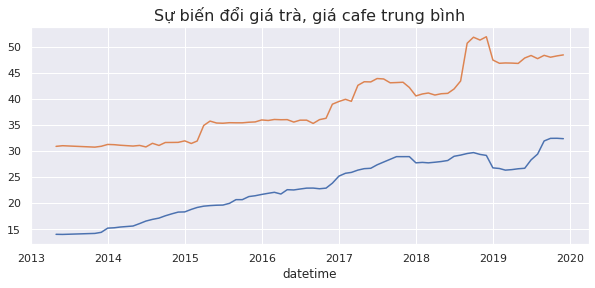

In [5]:
plt.rcParams['figure.figsize'] = [10,4]
df['datetime'] = pd.to_datetime(df['Year'].astype(str) + '/' +
                                df['Month'].astype(str))

tea_data = df[df['ProductName']=='Tea - Retail'].\
        groupby(['datetime'])['Price'].mean()
cafe_data = df[df['ProductName']=='Coffee - Retail'].\
        groupby(['datetime'])['Price'].mean()

sns.lineplot(x = tea_data.index, y = tea_data.values, linestyle = 'solid')
sns.lineplot(x = cafe_data.index, y = cafe_data.values, linestyle = 'solid')
plt.title('Sự biến đổi giá trà, giá cafe trung bình', fontsize = 16)
plt.show()

In [6]:
tea_cafe_date = df.loc[df['ProductName'].isin(['Tea - Retail','Coffee - Retail'])]
tea_cafe_date['time-place'] = tea_cafe_date.loc[:,'datetime'].astype(str) + '-' + \
                              tea_cafe_date.loc[:,'Place'].astype(str)
tea_df = tea_cafe_date.loc[tea_cafe_date['ProductName'] == 'Tea - Retail',['time-place','Price']]
tea_df = tea_df.rename(columns = {'Price'  : 'Tea Price'})
cafe_df = tea_cafe_date.loc[tea_cafe_date['ProductName'] == 'Coffee - Retail',['time-place','Price']]
cafe_df = cafe_df.rename(columns = {'Price'  : 'Coffee Price'})
merge_df = pd.merge(tea_df,cafe_df, on = 'time-place')
merge_df.head()

/tmp/ipykernel_8816/1854231611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tea_cafe_date['time-place'] = tea_cafe_date.loc[:,'datetime'].astype(str) + '-' + \


,time-place,Tea Price,Coffee Price
0,2013-05-01-National Average,14.0201,30.8937
1,2013-06-01-National Average,14.0003,31.0164
2,2013-11-01-National Average,14.1921,30.7445
3,2013-12-01-National Average,14.3991,30.9079
4,2014-01-01-National Average,15.2072,31.2607


### Kiểm định giả thuyết : Giá Coffee = Giá Tea + 15 Lira
- H0 : Coffee = Tea + 15
- H1 : Coffee > Tea + 15 (có thể bé hơn hoặc khác)

In [7]:
d = merge_df['Coffee Price'] - merge_df['Tea Price'] - 15
statistic, pvalue = wilcoxon(d, alternative= 'greater' )
print(f'Giá trị t-statistic: {statistic}')
print(f'Giá trị p_value: {p_value}')

Giá trị t-statistic: 9838.0
Giá trị p_value: 7.11046528586048e-55


### Kết luận : Bác bỏ H0 => giá Coffee cao hơn giá Tea hơn 15 Lira/kg

# 2. Quanlity Associates

In [8]:
df = pd.read_excel('Data/Quality.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Sample 1,Sample 2,Sample 3,Sample 4
0,11.55,11.62,11.91,12.02
1,11.62,11.69,11.36,12.02
2,11.52,11.59,11.75,12.05
3,11.75,11.82,11.95,12.18
4,11.90,11.97,12.14,12.11


In [9]:
df.describe()

,Sample 1,Sample 2,Sample 3,Sample 4
count,30.000000,30.000000,30.000000,30.000000
mean,11.958667,12.028667,11.889000,12.081333
std,0.220356,0.220356,0.207171,0.206109
min,11.520000,11.590000,11.360000,11.640000
25%,11.812500,11.882500,11.752500,11.982500
50%,11.955000,12.025000,11.920000,12.080000
75%,12.145000,12.215000,11.997500,12.227500
max,12.320000,12.390000,12.220000,12.470000


In [28]:
data = np.array([])
for i in df.columns:
    data = np.concatenate([data,df[i]], axis = 0)

data = pd.DataFrame(data, columns=['Weight'])
data.describe()

,Weight
count,120.000000
mean,11.989417
std,0.223108
min,11.360000
25%,11.850000
50%,12.000000
75%,12.160000
max,12.470000


### Nhận xét
- std = 0.223 > 0.21 --> nên thay đổi nhận xét về sai số của sản phầm
- Phát biểu giả thuyết
    - H0 : $\mu $ = 12
    - H1 : $\mu $ != 12

In [31]:
statistic, p_value = ttest_1samp(data['Weight'],popmean=12)
print(f'Giá trị t-statistic: {statistic}')
print(f'Giá trị p_value: {p_value}')

Giá trị t-statistic: -0.5196355789314843
Giá trị p_value: 0.6042828222996104


### Kết luận : p_value > $\alpha$ = 0.01 
- **Chưa đủ cơ sở bác bỏ H0. Vậy với độ tin cậy 99% thì khổi lượng trung bình của sản phầm là 12**

# Coca_cola_use

In [2]:
df= pd.read_excel('Data/Coca_cola_use.xlsx').set_index('STT')
df.describe()

,Ohio,Atlanta
count,50.000000,50.000000
mean,1.746800,1.614800
std,1.092211,1.061068
min,0.000000,0.000000
25%,0.835000,0.682500
50%,1.615000,1.495000
75%,2.350000,2.402500
max,5.000000,3.860000


- Phát biểu giả thuyết:
    - H0 : $\mu_{Ohio}$ = $\mu_{Atlanta}$
    - H1 : $\mu_{Ohio}$ $\gt$ $\mu_{Atlanta}$

In [5]:
statistic, p_value = ttest_ind(df['Ohio'], df['Atlanta'], equal_var = False, alternative='greater')
print(f'Giá trị t-statistic: {statistic}')
print(f'Giá trị p_value: {p_value}')

Giá trị t-statistic: 0.6129544104328379
Giá trị p_value: 0.27066377753802684


### Kết luận : p_value > $\alpha$ 
- Chưa đủ cơ sở bác bỏ H0
- Vậy với độ tin cậy 95% thì có thể kết luận lượng tiêu thủ ở Ohio và Atlanta bằng nhau.